# Import Liberaries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() <= 20:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

Tenure : [ 2  1  8  7  4  6  3 10  5  9  0]
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
NumOfProducts : [1 3 2 4]
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard : [1 0]
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember : [1 0]
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited : [1 0]
Exited
0    7963
1    2037
Name: count, dtype: int64


In [8]:
for column in df.columns:
    if df[column].dtype == object and df[column].nunique() <= 10:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

Geography : ['France' 'Spain' 'Germany']
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      5457
Female    4543
Name: count, dtype: int64


# EDA

## CreditScore

A numerical score representing a customer's creditworthiness. Higher scores typically indicate better credit history.

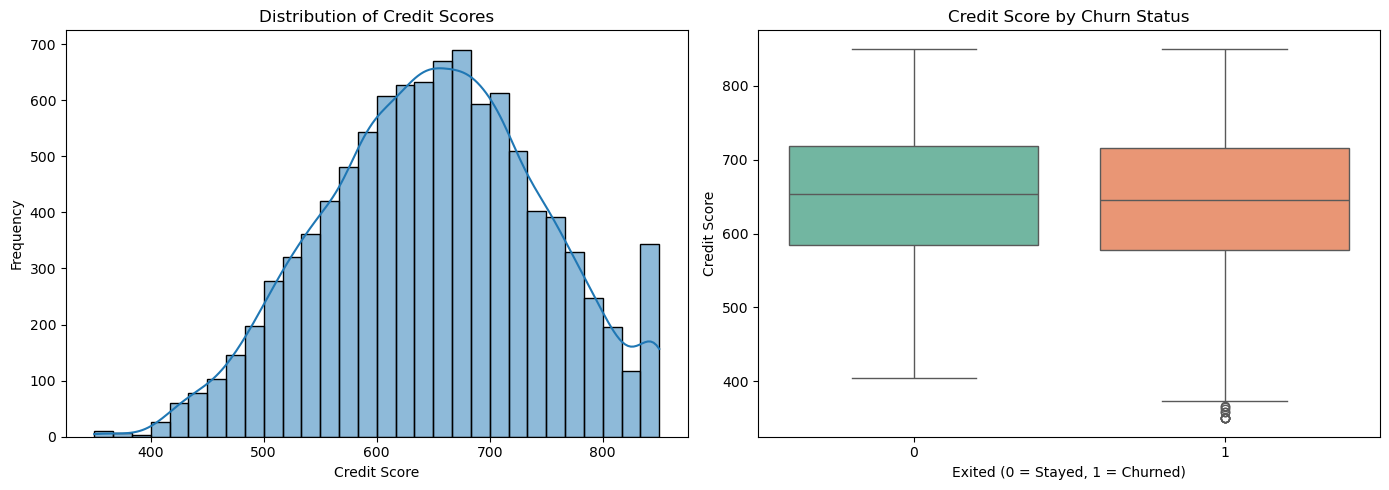

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution Plot
sns.histplot(df['CreditScore'], kde=True, bins=30, palette='pastel', ax=axes[0])
axes[0].set_title('Distribution of Credit Scores')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Frequency')

# Boxplot by Churn
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Credit Score by Churn Status')
axes[1].set_xlabel('Exited (0 = Stayed, 1 = Churned)')
axes[1].set_ylabel('Credit Score')

plt.tight_layout()
plt.show()

In [10]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

* The distribution of credit scores is roughly normal, centered around 600–700.
* There's a small decrease in the average credit score for customers who churned (Exited = 1).
* However, the overlap between the groups is significant, indicating that credit score alone is not a strong predictor of churn.

## Geography

The country where the customer resides (e.g., France, Germany, Spain).

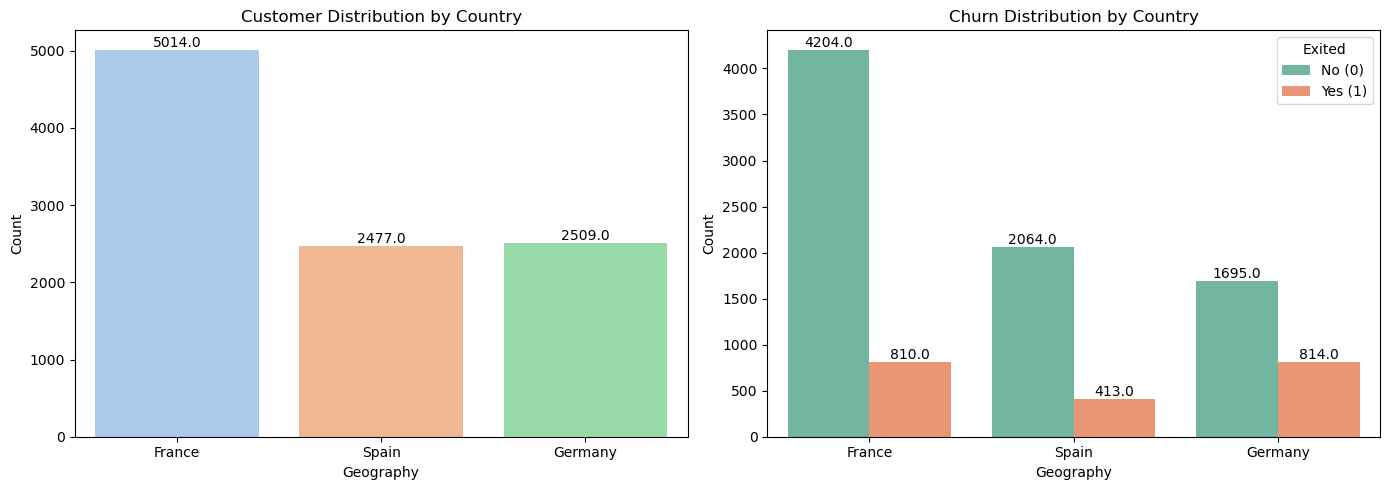

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Univariate: Total count per country ---
sns.countplot(x='Geography', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Customer Distribution by Country')
axes[0].set_ylabel('Count')

# Add labels
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10)

# --- Bivariate: Churn per country ---
sns.countplot(x='Geography', hue='Exited', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Churn Distribution by Country')
axes[1].set_ylabel('Count')
axes[1].legend(title='Exited', labels=['No (0)', 'Yes (1)'])

# Add labels
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

* Most customers are from France, followed by Spain and Germany.
* Germany has a noticeably higher churn rate than France or Spain.
* Spain has the lowest churn count despite having fewer total customers than France.
>This suggests Geography is highly relevant for churn prediction

## Gender

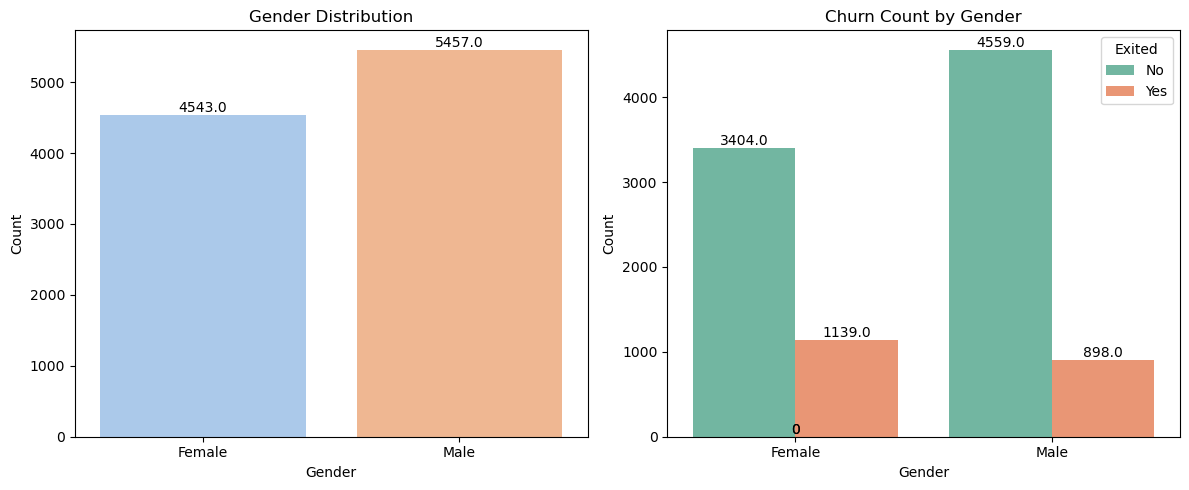

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Univariate plot (count of each gender)
ax0 = sns.countplot(data=df, x='Gender', ax=axes[0], palette='pastel')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Add data labels to the univariate plot
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Bivariate plot (churn count by gender)
ax1 = sns.countplot(data=df, x='Gender', hue='Exited', ax=axes[1], palette='Set2')
axes[1].set_title('Churn Count by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Exited', labels=['No', 'Yes'])

# Add data labels to the bivariate plot
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Improve layout
plt.tight_layout()
plt.show()


* There is a slight imbalance in the gender distribution.
* Female customers have a higher churn rate compared to males.

## Age

The age of the customer in years.

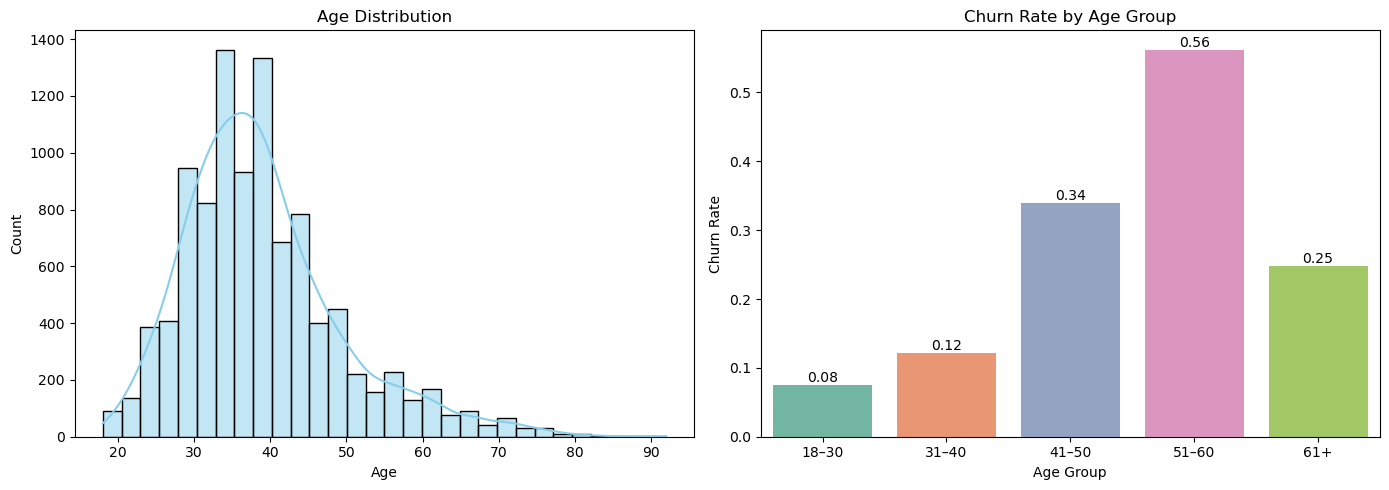

In [13]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], 
                        labels=['18–30', '31–40', '41–50', '51–60', '61+'])

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Univariate plot: Age distribution
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Bivariate plot: Churn rate by age group
churn_by_age = df.groupby('AgeGroup')['Exited'].mean().reset_index()
ax1 = sns.barplot(data=churn_by_age, x='AgeGroup', y='Exited', ax=axes[1], palette='Set2')
axes[1].set_title('Churn Rate by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Churn Rate')

# Add data labels to the bivariate plot
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Improve layout
plt.tight_layout()
plt.show()

* Age is a strong predictor. The churn rate increases sharply for customers over 40. Younger customers are more likely to stay.

## Tenure

The number of years the customer has been with the bank.

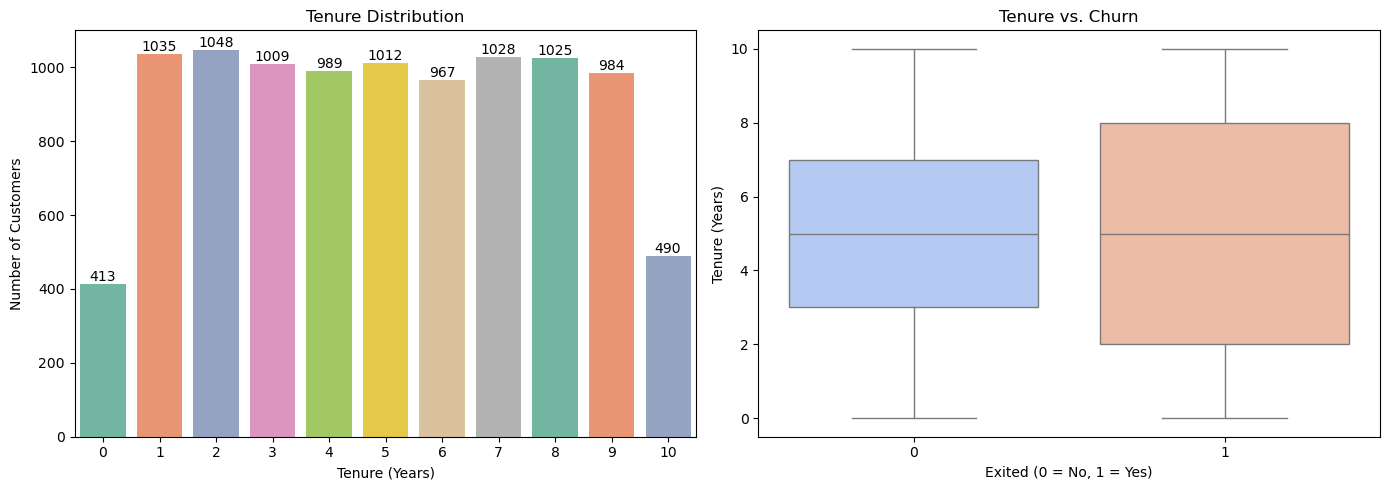

In [14]:
# Calculate tenure counts for barplot
tenure_counts = df['Tenure'].value_counts().sort_index().reset_index()
tenure_counts.columns = ['Tenure', 'Count']

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Univariate: Barplot of tenure
ax0 = sns.barplot(data=tenure_counts, x='Tenure', y='Count', ax=axes[0], palette='Set2')
axes[0].set_title('Tenure Distribution')
axes[0].set_xlabel('Tenure (Years)')
axes[0].set_ylabel('Number of Customers')

# Add data labels
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Bivariate: Boxplot by churn
sns.boxplot(data=df, x='Exited', y='Tenure', ax=axes[1], palette='coolwarm')
axes[1].set_title('Tenure vs. Churn')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Tenure (Years)')

plt.tight_layout()
plt.show()

* we have a fairly uniform (values 0–10 years). which leads us to conclude that customers with any tenure may churn.

## Balance

The current balance in the customer's bank account.

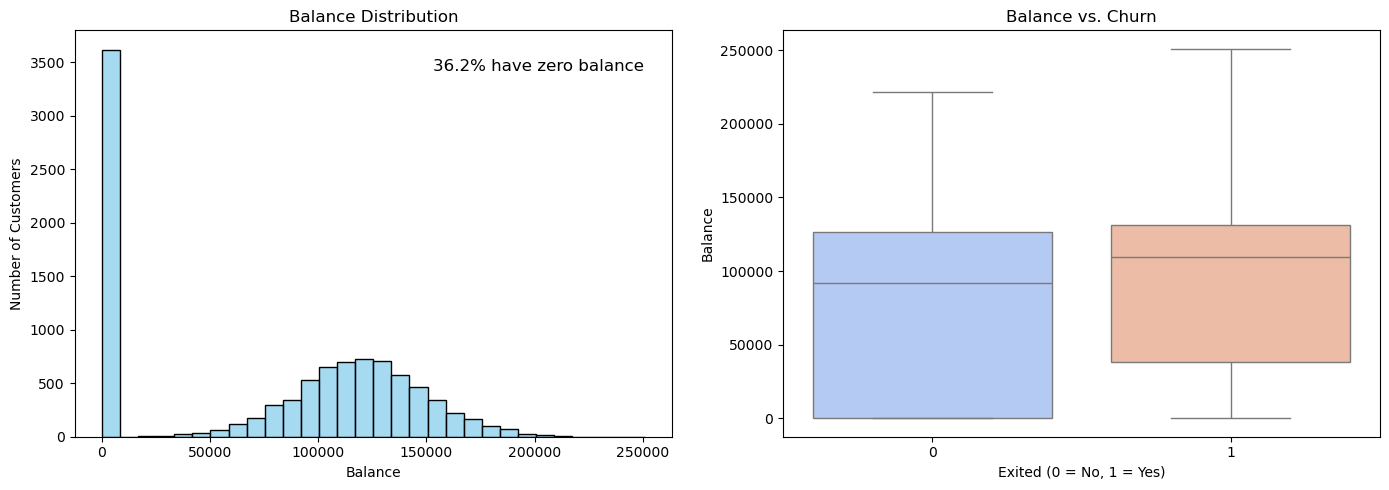

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Univariate: Histogram
sns.histplot(df['Balance'], bins=30, kde=False, ax=axes[0], color='Skyblue')
axes[0].set_title('Balance Distribution')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Number of Customers')

# Annotate proportion of zero balances
zero_balance_pct = (df['Balance'] == 0).mean() * 100
axes[0].annotate(f'{zero_balance_pct:.1f}% have zero balance', 
                 xy=(0.6, 0.9), xycoords='axes fraction', fontsize=12)

# Bivariate: Boxplot by churn
sns.boxplot(data=df, x='Exited', y='Balance', ax=axes[1], palette='coolwarm')
axes[1].set_title('Balance vs. Churn')
axes[1].set_xlabel('Exited (0 = No, 1 = Yes)')
axes[1].set_ylabel('Balance')

plt.tight_layout()
plt.show()

* Many customers have zero balance, but also a large range of high balances.
> Customers with higher balances tend to churn more.

## NumOfProducts

The number of bank products the customer uses (e.g., savings account, credit card, mortgage).

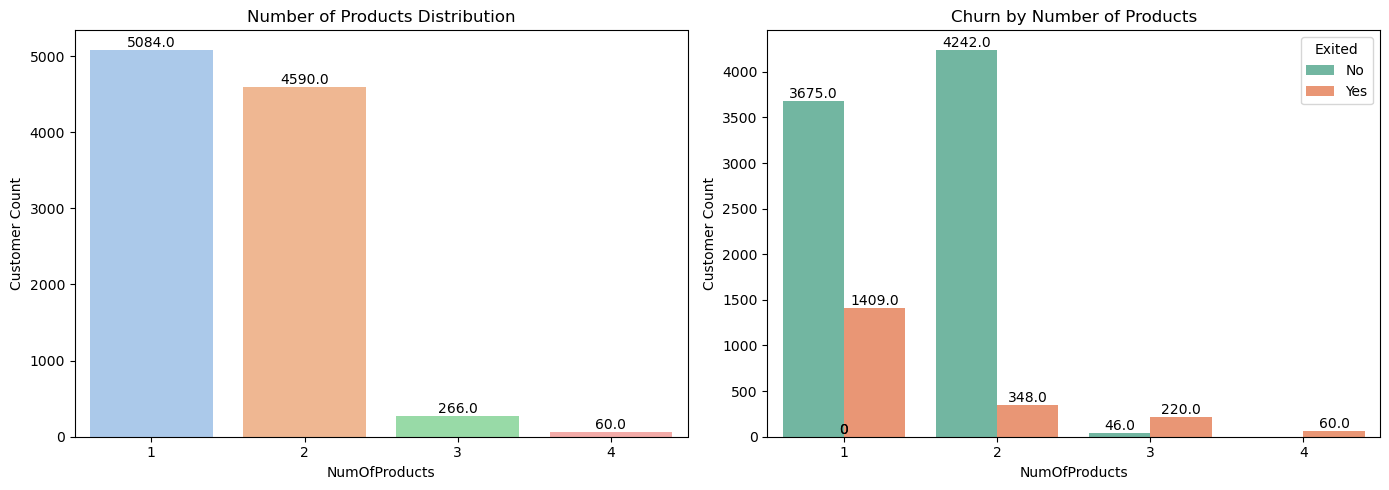

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Univariate
ax0 = sns.countplot(data=df, x='NumOfProducts', ax=axes[0], palette='pastel')
axes[0].set_title('Number of Products Distribution')
axes[0].set_ylabel('Customer Count')

# Add data labels
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Bivariate
ax1 = sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=axes[1], palette='Set2')
axes[1].set_title('Churn by Number of Products')
axes[1].set_ylabel('Customer Count')
axes[1].legend(title='Exited', labels=['No', 'Yes'])

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


* Customers with 1 product have higher churn.
* Those with 2 products are most stable.
* Those with 4 products have a sharp spike in churn.

## HasCrCard

Indicates whether the customer has a credit card (1 = Yes, 0 = No).

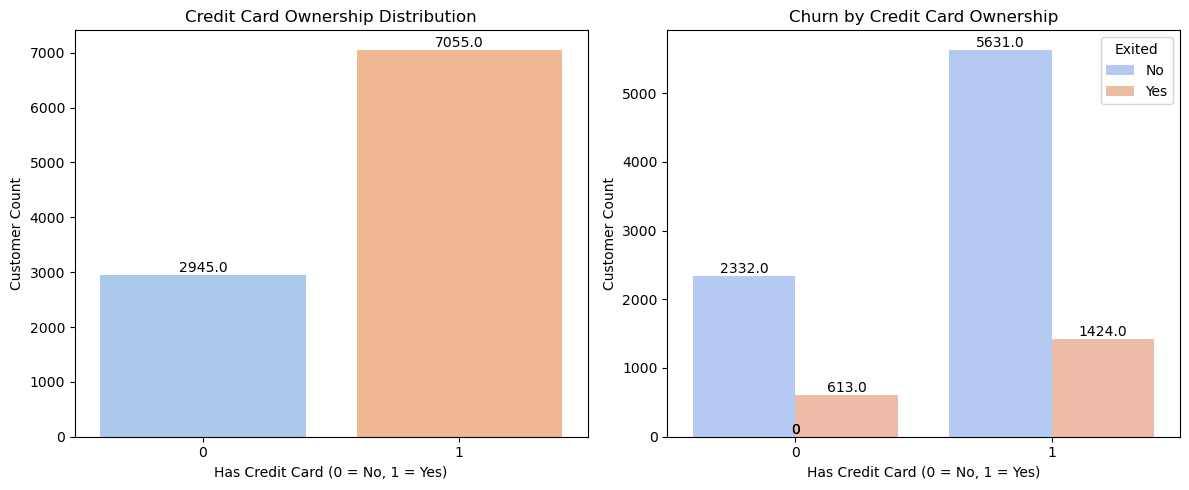

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Univariate plot
ax0 = sns.countplot(data=df, x='HasCrCard', palette='pastel', ax=axes[0])
axes[0].set_title('Credit Card Ownership Distribution')
axes[0].set_xlabel('Has Credit Card (0 = No, 1 = Yes)')
axes[0].set_ylabel('Customer Count')

# Add data labels
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Bivariate plot
ax1 = sns.countplot(data=df, x='HasCrCard', hue='Exited', palette='coolwarm', ax=axes[1])
axes[1].set_title('Churn by Credit Card Ownership')
axes[1].set_xlabel('Has Credit Card (0 = No, 1 = Yes)')
axes[1].set_ylabel('Customer Count')
axes[1].legend(title='Exited', labels=['No', 'Yes'])

# Add data labels
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

* most customers have a credit card.
* but, there a little difference in churn rate between groups.

> Having a credit card does not significantly impact churn.

## IsActiveMember

Indicates whether the customer is actively using the bank's services (1 = Yes, 0 = No).

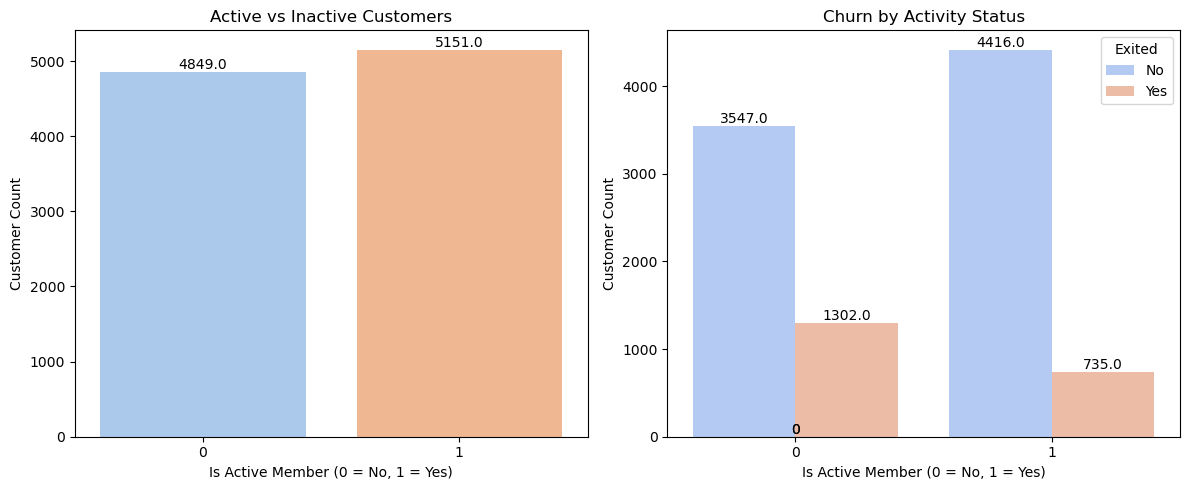

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Univariate plot
ax0 = sns.countplot(data=df, x='IsActiveMember', ax=axes[0], palette='pastel')
axes[0].set_title('Active vs Inactive Customers')
axes[0].set_xlabel('Is Active Member (0 = No, 1 = Yes)')
axes[0].set_ylabel('Customer Count')

# Add data labels
for p in ax0.patches:
    height = p.get_height()
    ax0.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

# Bivariate plot
ax1 = sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=axes[1], palette='coolwarm')
axes[1].set_title('Churn by Activity Status')
axes[1].set_xlabel('Is Active Member (0 = No, 1 = Yes)')
axes[1].set_ylabel('Customer Count')
axes[1].legend(title='Exited', labels=['No', 'Yes'])

# Add data labels
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

* Inactive members have a significantly higher churn rate.
* Being an active member is a strong indicator of customer retention.

## EstimatedSalary

The estimated annual salary of the customer.

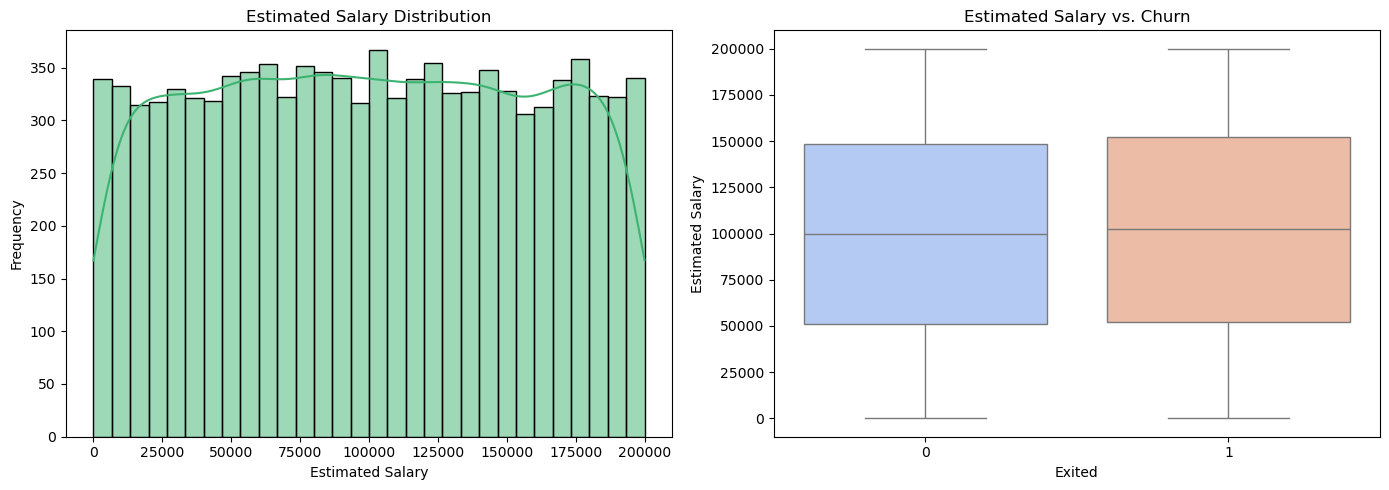

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Univariate
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, ax=axes[0], color='mediumseagreen')
axes[0].set_title('Estimated Salary Distribution')
axes[0].set_xlabel('Estimated Salary')
axes[0].set_ylabel('Frequency')

# Bivariate
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', ax=axes[1], palette='coolwarm')
axes[1].set_title('Estimated Salary vs. Churn')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Estimated Salary')

plt.tight_layout()
plt.show()

* Uniformly distributed. No visible pattern; high and low earners both churn.
* Salary has no meaningful correlation with churn.

## Exited


The target variable — whether the customer has left the bank (1 = Yes, 0 = No).

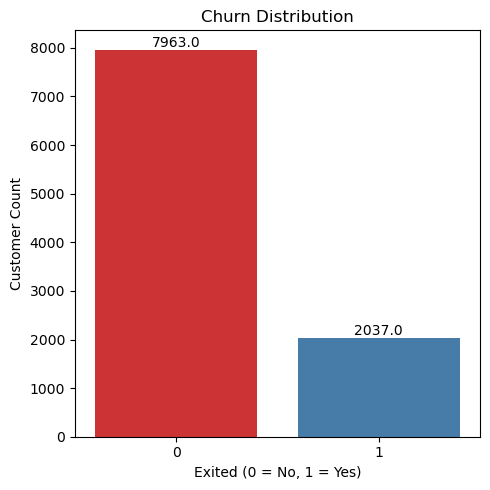

In [20]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x='Exited', palette='Set1')
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Customer Count')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


> Imbalanced — about 20% of customers churned.

# Data Preprocessing

In [21]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [22]:
label_encoders = {
    'Geography': LabelEncoder(),
    'AgeGroup': LabelEncoder()
}

for col in label_encoders:
    df[col] = label_encoders[col].fit_transform(df[col])

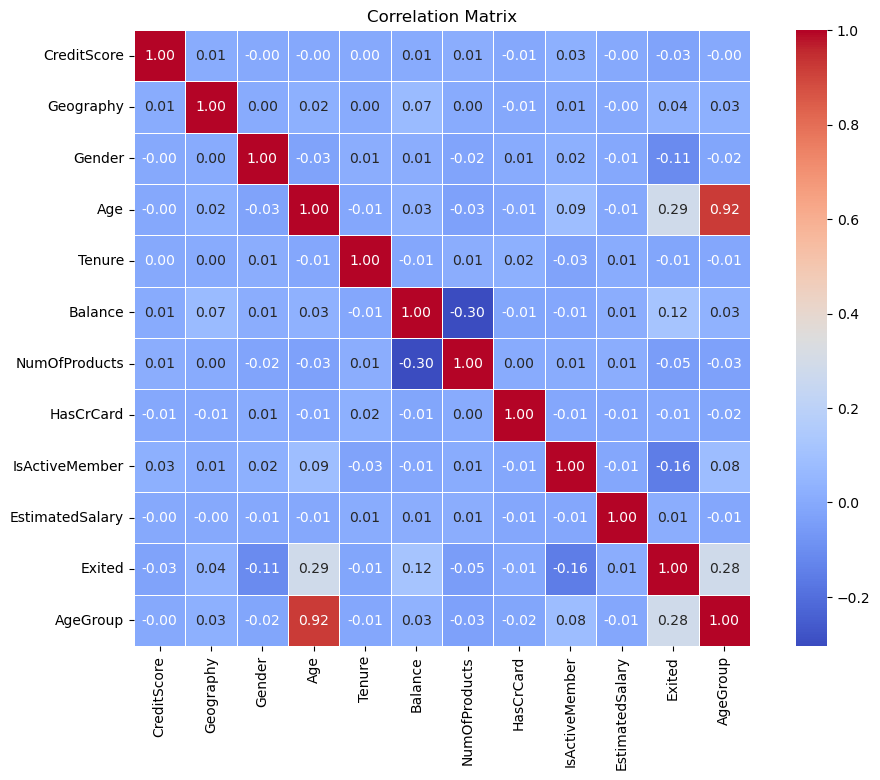

In [24]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Modeling

In [25]:
X = df.drop(['Exited', 'Age'], axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# 2. Scale after splitting
features_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary']

# Apply Standard Scaling
scaler = StandardScaler()

# Fit scaler on training data only
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Then transform the test data
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=10, metric='euclidean'),
    "SVM": SVC(kernel='rbf', C=10, gamma=0.01),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "CatBoost": CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, l2_leaf_reg=3,
    random_seed=42, verbose=0),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, num_leaves=20, random_state=42)
}

In [28]:
accuracy = []
conf_matrices = {}  # To store confusion matrices

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)

    # Precision, Recall, F1
    precision_score_train = precision_score(y_train, y_train_pred, average='weighted')
    precision_score_test = precision_score(y_test, y_test_pred, average='weighted')

    recall_score_train = recall_score(y_train, y_train_pred, average='weighted')
    recall_score_test = recall_score(y_test, y_test_pred, average='weighted')

    F_Train = f1_score(y_train, y_train_pred, average='weighted')
    F_Test = f1_score(y_test, y_test_pred, average='weighted')

    accuracy.append([
        accuracy_score_train, precision_score_train, recall_score_train, F_Train,
        accuracy_score_test, precision_score_test, recall_score_test, F_Test
    ])

    # Save confusion matrix for test set
    conf_matrices[model_name] = confusion_matrix(y_test, y_test_pred)

    print(f'{model_name} is done!')

Logistic Regression is done!
KNN is done!
SVM is done!
Decision Tree is done!
Random Forest is done!
Naive Bayes is done!
XGBoost is done!
AdaBoost is done!
Gradient Boosting is done!
CatBoost is done!
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM is done!


In [29]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train","Acc_Test","pre_Test","Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
Logistic Regression,0.812750,0.787642,0.812750,0.769790,0.8200,0.793584,0.8200,0.778906
KNN,0.839500,0.839710,0.839500,0.804743,0.8340,0.825862,0.8340,0.793783
SVM,0.834750,0.842291,0.834750,0.793125,0.8395,0.846321,0.8395,0.797060
Decision Tree,0.995375,0.995370,0.995375,0.995371,0.7920,0.795219,0.7920,0.793554
Random Forest,0.999500,0.999500,0.999500,0.999500,0.8630,0.852774,0.8630,0.850794
Naive Bayes,0.830000,0.819951,0.830000,0.793931,0.8300,0.812097,0.8300,0.793907
XGBoost,0.924375,0.925008,0.924375,0.919710,0.8615,0.851029,0.8615,0.850997
AdaBoost,0.850625,0.839558,0.850625,0.833975,0.8525,0.839630,0.8525,0.838517
Gradient Boosting,0.868375,0.863234,0.868375,0.853647,0.8620,0.852236,0.8620,0.846915
CatBoost,0.886000,0.883406,0.886000,0.875449,0.8700,0.861976,0.8700,0.857133


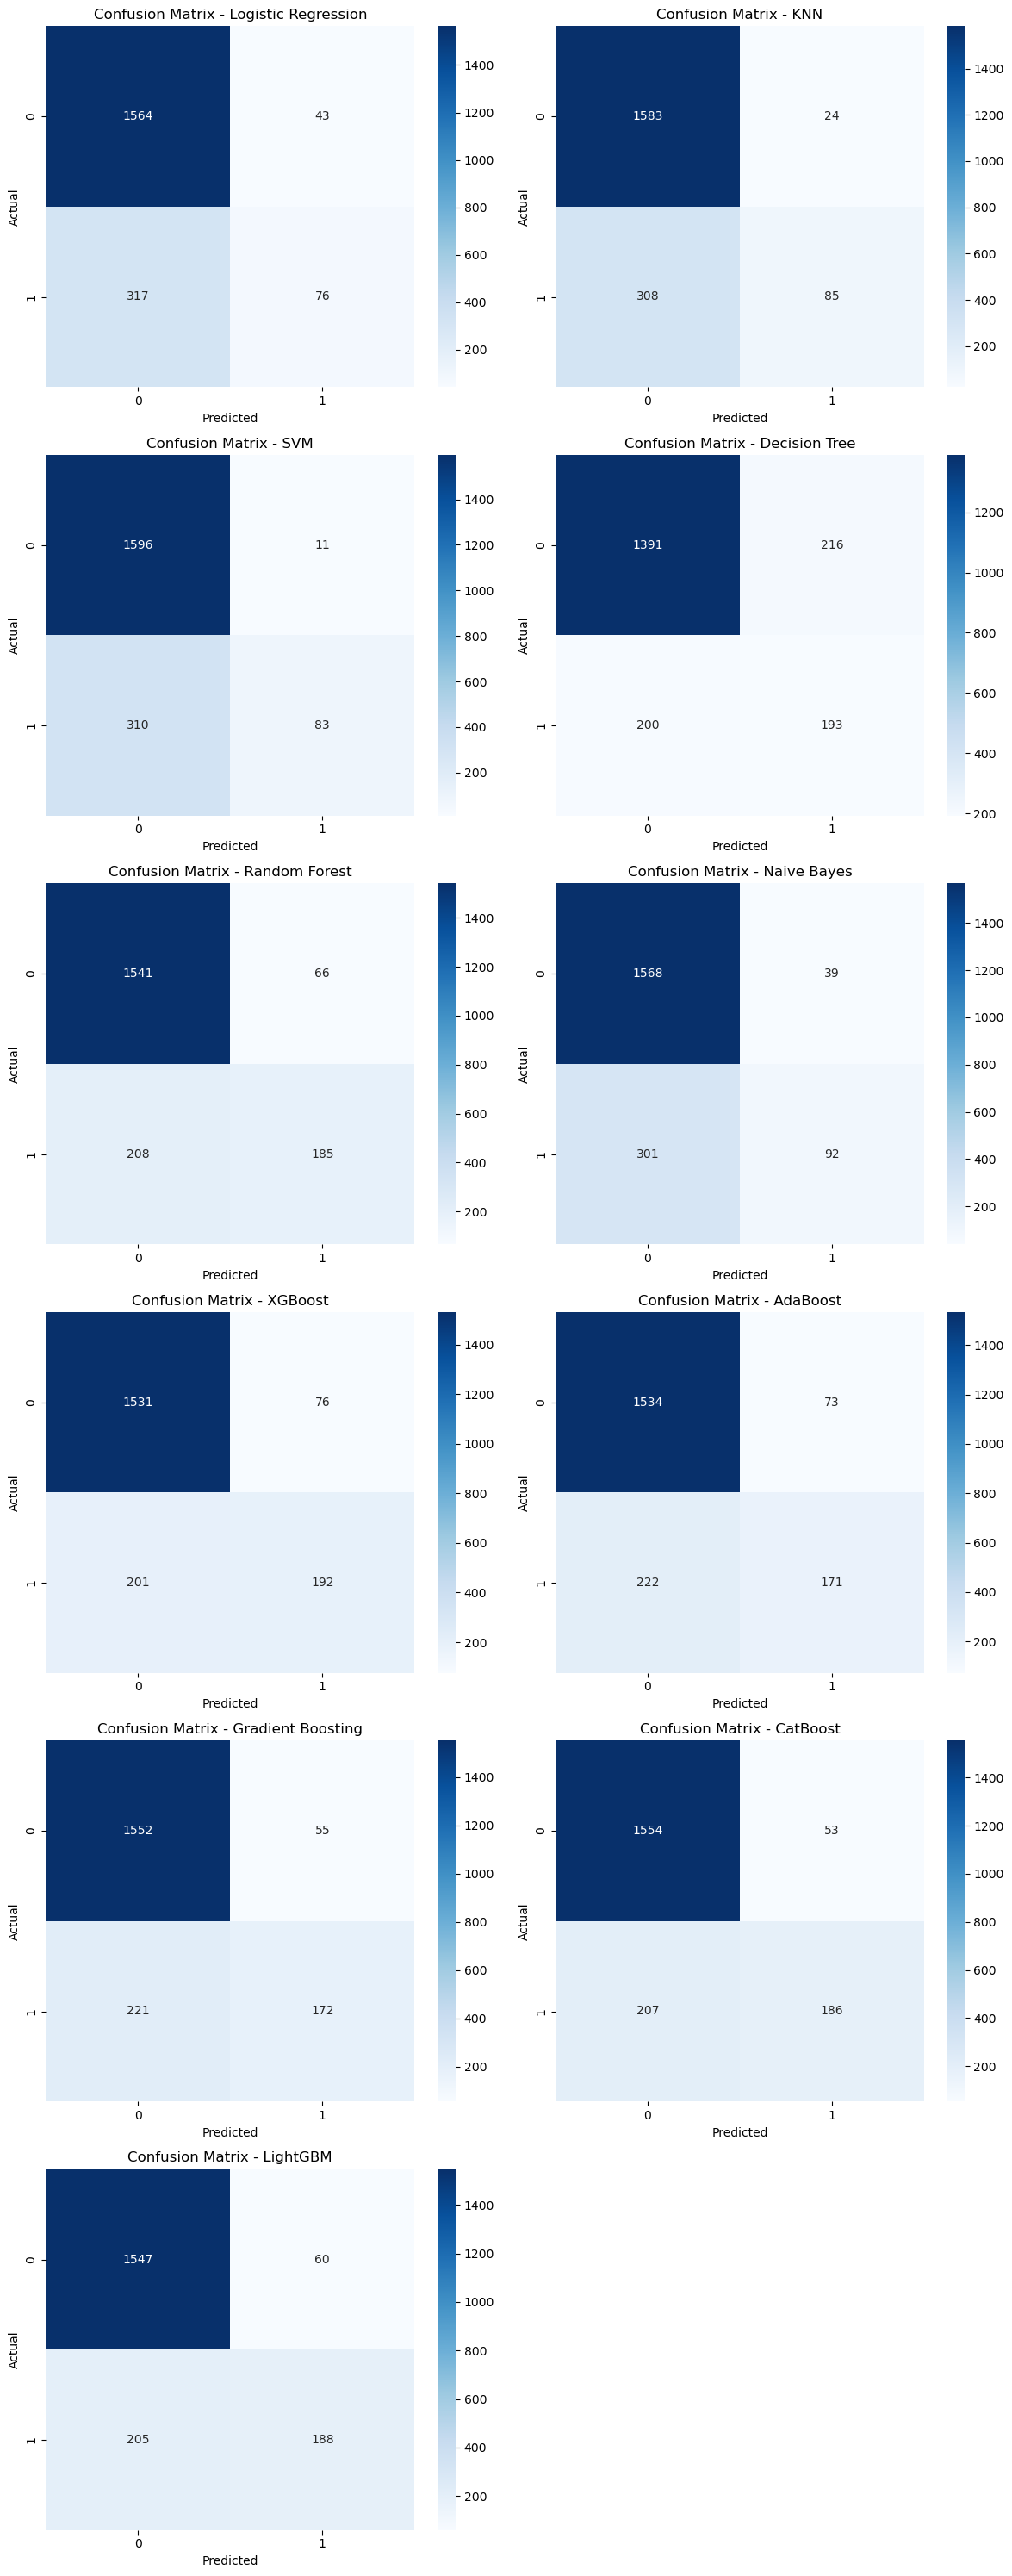

In [30]:
n_models = len(conf_matrices)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for idx, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# If there are empty subplots, remove them
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [31]:
tuning_config = {
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(random_seed=42, verbose=0),
        "params": {
            'iterations': [100, 300, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8],
            'l2_leaf_reg': [1, 3, 5]
        }
    }
}

In [32]:
from sklearn.model_selection import GridSearchCV

accuracy = []
conf_matrices = {}

for model_name, config in tuning_config.items():
    print(f"Tuning {model_name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='accuracy',  # Change to 'roc_auc' or 'f1' if needed
        cv=5,
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    prec_train = precision_score(y_train, y_train_pred, average='weighted')
    prec_test = precision_score(y_test, y_test_pred, average='weighted')

    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')

    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    accuracy.append([
        acc_train, prec_train, recall_train, f1_train,
        acc_test, prec_test, recall_test, f1_test
    ])

    conf_matrices[model_name] = confusion_matrix(y_test, y_test_pred)

    print(f'{model_name} is done!')

Tuning XGBoost...
XGBoost is done!
Tuning CatBoost...
CatBoost is done!


In [34]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train","F1_Train","Acc_Test","pre_Test","Rec_Test","F1_Test"],index=conf_matrices.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
XGBoost,0.871375,0.866139,0.871375,0.858057,0.8655,0.856264,0.8655,0.852075
CatBoost,0.872625,0.868771,0.872625,0.858481,0.8660,0.857798,0.8660,0.850876


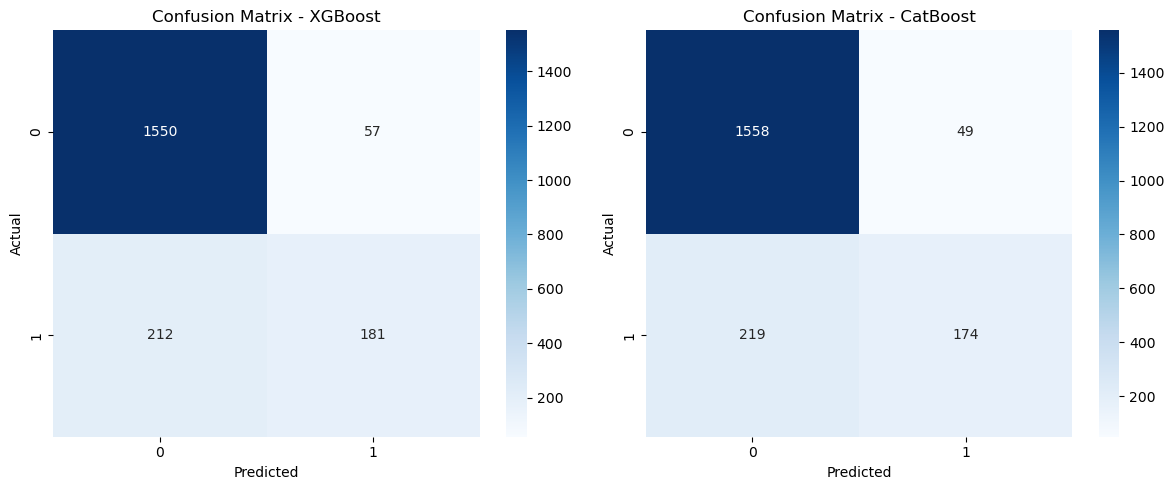

In [35]:
n_models = len(conf_matrices)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for idx, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# If there are empty subplots, remove them
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Deploying

In [39]:
print(best_model)

In [42]:
features = ['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
                 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
                 'AgeGroup']

In [43]:
import pickle

# Bundle everything into a tuple
with open('churn_model.pkl', 'wb') as f:
    pickle.dump((best_model, scaler, label_encoders, features), f)

print("✅ Model, scaler, label_encoders, and features saved in churn_model.pkl")

✅ Model, scaler, label_encoders, and features saved in churn_model.pkl
